In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

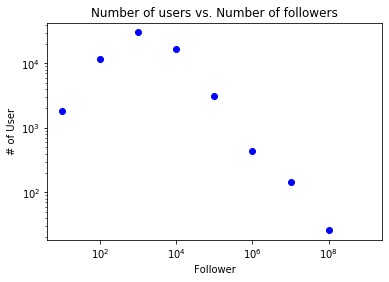

In [2]:
'''
Read data from the file and check the format about the data
'''
df = pd.read_csv('./NewTweetInfo.csv')
'''
Modification on the data and separate them as Attribute and Target
'''
X = df.iloc[:, 3]     # User Id
# frequencies
Y = df.iloc[:, 5]     # Follower Number

x_ = [10**i for i in range(1,10)]
y_ = [0] * len(x_)
for val in Y:
    if val == 0:
        continue
    temp = int(math.log(val,10))
    y_[temp] += 1
plt.plot(x_,y_,"bo")
plt.title("Number of users vs. Number of followers")
plt.xlabel("Follower")
plt.ylabel("# of User")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [10]:
Important = 5000
l = ['Tweet_time','FollowerCount']
time = df.loc[:, df.columns.isin(l)]
t = list(time['Tweet_time'])
f_count = list(time['FollowerCount'])
res = []
count1 = 0
count2 = 0
for index in range(len(t)):
    res.append((t[index],f_count[index]))
    if f_count[index] > 5000:
        count1 += 1
    else:
        count2 += 1
    
print(len(res), count1, count2)

64575 6382 58193


In [15]:
important_user = [0]* 92
unimportant_user = [0] * 92
for val in res:
    t = 0
    if val[0][4:7] == "Feb":
        t += 31 + int(val[0][8:10])
    elif val[0][4:7] == "Mar":
        t += 60 + int(val[0][8:10])
    else:
        t += int(val[0][8:10])
    if int(val[1]) > Important:
        important_user[t] += 1
    else:
        unimportant_user[t] += 1
print(important_user)
print(unimportant_user)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 22, 58, 66, 88, 80, 84, 157, 213, 164, 67, 76, 79, 105, 89, 117, 77, 82, 86, 105, 104, 98, 109, 107, 77, 81, 106, 98, 104, 101, 110, 88, 0, 69, 89, 113, 104, 205, 425, 297, 76, 323, 369, 96, 108, 82, 96, 90, 81, 94, 67, 74, 71, 66, 74, 75, 73, 76, 70, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 34, 157, 544, 814, 1101, 841, 705, 1532, 1789, 1711, 728, 813, 785, 857, 821, 861, 808, 768, 747, 826, 842, 771, 861, 782, 722, 748, 755, 848, 765, 834, 851, 744, 0, 724, 775, 933, 953, 1670, 3062, 2308, 819, 2623, 2790, 955, 987, 977, 965, 949, 930, 933, 897, 910, 927, 888, 860, 849, 768, 875, 911, 188, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


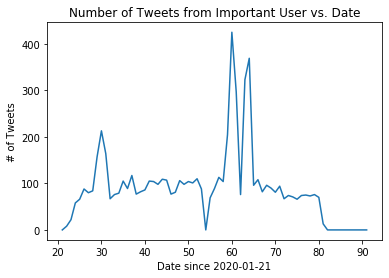

In [12]:
plt.plot([x for x in range(21,92)],important_user[21:])
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

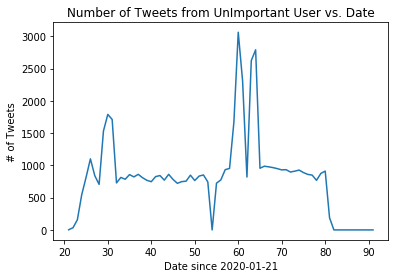

In [13]:
plt.plot([x for x in range(21,92)],unimportant_user[21:])
plt.title("Number of Tweets from UnImportant User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

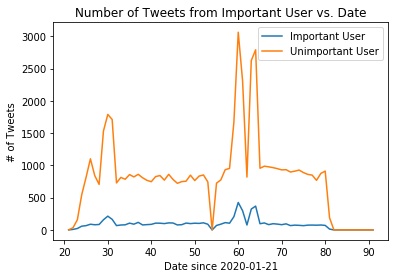

In [17]:
fig, ax = plt.subplots()
ax.plot([x for x in range(21,92)],important_user[21:],label = "Important User")
ax.plot([x for x in range(21,92)],unimportant_user[21:], label = "Unimportant User")
ax.legend(loc = 'upper right')
plt.title("Number of Tweets from Important User vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()